In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets.samples_generator import make_blobs

/home/eebc177student/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from sklearn.cluster import KMeans

In [10]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


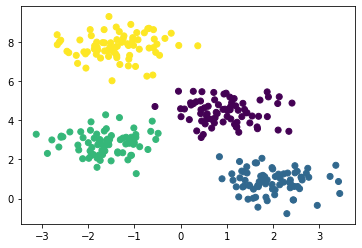

In [11]:
plt.scatter(X[:,0], X[:,1], c=y)

In [14]:
wcss= []
k_min = 1
k_max = 10 #overshoot the max number of clusters you think there may be if you dont know how many clusters there are

for i in range(k_min, k_max+1):
    kmeans= KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0) #k-means++ is a type of program that makes the for loop go faster
    kmeans.fit(X) #fit the model to our data set
    wcss.append(kmeans.inertia_)#storing it to a list
    

In [15]:
print(wcss)

[2812.137595303234, 1190.7823593643445, 546.8911504626296, 212.00599621083478, 188.7732355677372, 170.72930303135, 152.58511017298733, 138.39719387330848, 124.45515950322834, 113.13267210634592]


Text(0, 0.5, 'WCSS')

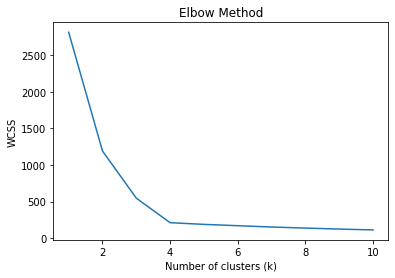

In [17]:
plt.plot(range(k_min,k_max+1),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

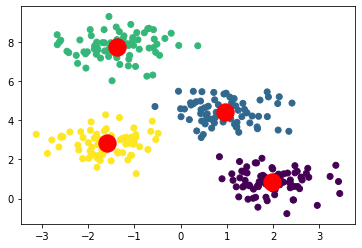

In [21]:
kmeans= KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y=kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')